# 23_04_25_03_erythroid_lineage_下游分析3_转录爆发基因的单个速率基因查看

In [1]:
import sys
sys.path = ["../.."] + sys.path # 切换到项目目录下

import scanpy as sc
import scvelo as scv
import velovgi

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


Global seed set to 0
/usr/local/conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/usr/local/conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


## 1. 读取结果

In [2]:
adata_dir = "tmp/erythroid_lineage/adata"
adata = velovgi.tl.read_adata(adata_dir)
batch_key = "stage"
cluster_key = "celltype"
adata

load tmp/erythroid_lineage/adata/adata.h5ad
load tmp/erythroid_lineage/adata/sample_recover.pkl


AnnData object with n_obs × n_vars = 500 × 2000
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'is_sampled', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_colors', 'neighbors', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'sample_recover'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'velocity'
    obsp: 'connectivities', 'distances'

## 2. 单个基因的速率图

In [3]:
# gene_list = ["Hba-x", "Hbb-y", "Smlm1"]
# for gene in gene_list:
#     if gene not in list(adata.var.index):
#         print(gene)
# 此处MRURK基因Smlm1暂时不存在，应该是过滤高变基因的时候过滤掉了，无伤大雅，整体数据集不抽样的话应该就过滤不掉了。

gene_list = ["Hba-x", "Hbb-y"]

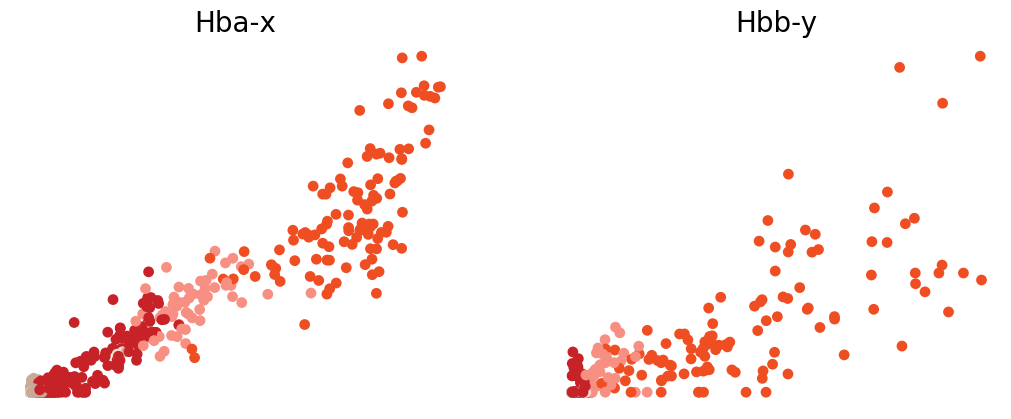

In [4]:
kwargs = dict(frameon=False, fontsize=20)
scv.pl.scatter(adata, basis=gene_list, color=cluster_key, **kwargs)

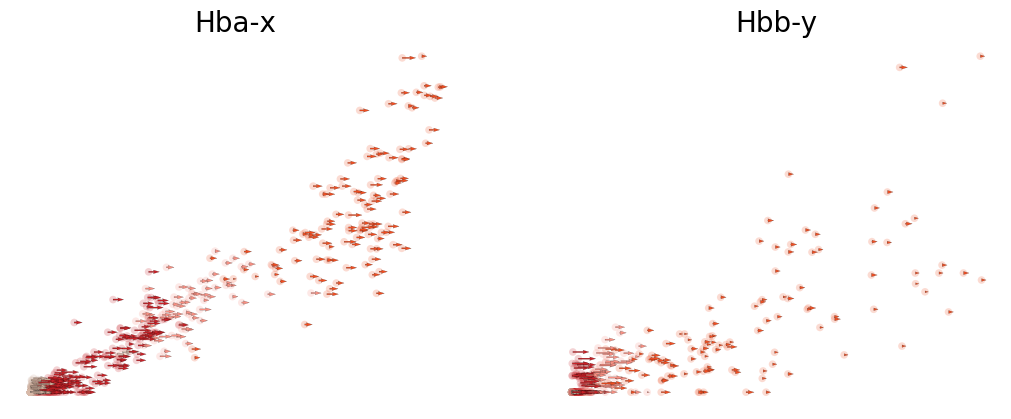

In [5]:
# TODO: 需要展现一下二维速率图
scv.pl.velocity_embedding(adata, basis=gene_list, color=cluster_key, **kwargs)